# Exploring Graphs via Singular Values/Eigenvalues

Singular values can be very useful to look at the structure of graphs, and to find cuts in graphs. 

The basic object of study is the _edge-vertex incidence matrix_ $B$ of a graph. For a graph with $m$ edges and $n$ vertices, this is an $m\times n$ matrix, where each row is an edge of the graph. Index the columns with the vertices. Now for each edge $\{i,j\}$, place a $+1$ in one of the two columns (say column $i$) and a $-1$ in the other (column $j$). Hence, the each row sums to zero. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

n = 40    # number of vertices
m = 200   # number of edges across the cut
m_in = 20   # number of edges within each side of the bipartition

B = np.zeros((m+2*m_in,n))
#A = np.zeros(n,n)
EdgeList = []

# add the edges across the cut
for r in range(0,m):
    i = np.random.randint(0,n/2)
    j = np.random.randint(n/2,n)
    B[r,i] = 1
    B[r,j] = -1
    EdgeList.append([i,j])
# the edges on the left
for r in range(0,m_in):
    i = np.random.randint(0,n/2)
    j = np.random.randint(0,n/2)
    B[m+r,i] = 1
    B[m+r,j] = -1
    EdgeList.append([i,j])
# the edges on the right
for r in range(m_in,2*m_in):
    i = np.random.randint(n/2,n)
    j = np.random.randint(n/2,n)
    B[m+r,i] = 1
    B[m+r,j] = -1
    EdgeList.append([i,j])

In [2]:
print(B[0])

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.
  0.  0.  0.  0.]


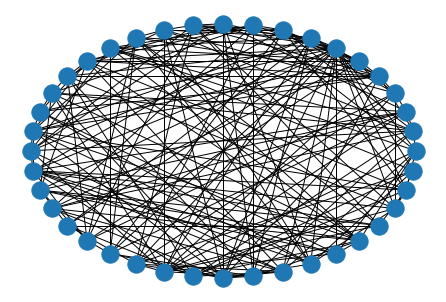

In [3]:
G = nx.from_edgelist(EdgeList)
nx.draw_circular(G)

We generated a graph on $40$ nodes with some structure hidden within it. We divided the nodes into two halves, and within each of the halves we added each edge with probability about $p = 1/20$. Across the two halves, the edges have been added with a much higher probability of $q = 1/2$. In other words, most of the edges are forming a bipartite graph, and a small number of edges have been added within each side of the bipartition.

However, looking at some visual representations of the graph, it's difficult to figure out this structure.

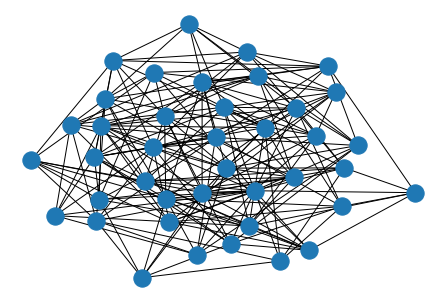

In [4]:
nx.draw_kamada_kawai(G)

But let's look at the spectral structure. Each edge is a "data point", and we have $m$ of them. The singular value decomposition of the matrix $B$ represents it as $U\Sigma V^\intercal$, with $U$ and $V$ having orthonormal columns, and $\Sigma$ being the diagonal matrix with the singular values. 

In [5]:
U,S,Vt = np.linalg.svd(B, full_matrices=False)

Recall that $S$ returned by the `numpy.linalg.svd` function is actually an array, with the singular values in decreasing order.

In [6]:
print(S)

[4.89133974 4.73270897 4.50744373 4.43656154 4.28477477 4.18699777
 4.0891174  4.07092079 3.98967786 3.90856234 3.86894949 3.81311354
 3.78068219 3.7632755  3.72714344 3.70385377 3.63844956 3.5266584
 3.48862826 3.45404909 3.40650666 3.33034899 3.23244634 3.18062161
 3.10164678 3.0675321  2.9866238  2.93684779 2.92005513 2.89638594
 2.80942637 2.75633198 2.7237506  2.69028796 2.6341012  2.57059369
 2.42287974 2.34596069 2.25955991 0.15205064]


Difficult to make sense of it right now---though the last singular vector seems to be zero. (The tiny value you see is just noise due to numerical issues.) This makes sense: the rank of the matrix $B$ is at most $n-1$, because if you sum the $n$ rows you get the zero vector, remember? And here we see that $B$ has rank exactly $n-1$ in this case, because the second-to-last singular value is non-zero.

Btw, what do the top singular *vectors* tell us? Let's plot them and see. Let's use the first two directions. We will use different colors for the first and last $n/2$ vertices. 

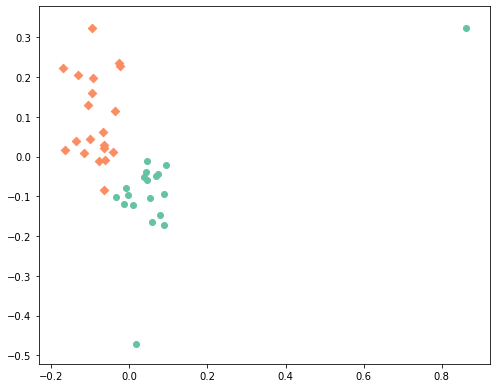

In [7]:
fig = plt.figure(figsize=(7.0,5.5))
ax = fig.add_subplot(111)

plt.scatter(Vt[0,:int(n/2)-1],
            Vt[1,:int(n/2)-1],
            marker='o',
            color='#66c2a5',
            zorder=1000)

plt.scatter(Vt[0,int(n/2):],
            Vt[1,int(n/2):],
            marker='D',
            color='#fc8d62',
            zorder=1000)

plt.tight_layout()

Nice. If we just plot the entries of the top (right)-singular vector $v_1$ (which is the same as `V[0,:]` in the code), we see the bipartition nicely -- the positive and negatives indices of this vector are precisely the bipartition. This partition becomes cleaner if we reduce the number of edges across the partition. (Feel free to play with the code above by changing the values of `m2`.) 

This idea that the top singular vector captures cuts with a large number of crossing edges can be used to give approximations for the max-cut problem. 

---

## Finding Small Cuts

How about finding small cuts? It seems natural now to look at the right singular vectors corresponding to the smallest singular values. (We will ignore the smallest singular value $\sigma_n = 0$.) For this, let's generate some graphs with a small-ish cut: again, take the random graph but now add in edges across the cut with a smaller probability than edges within the sides.

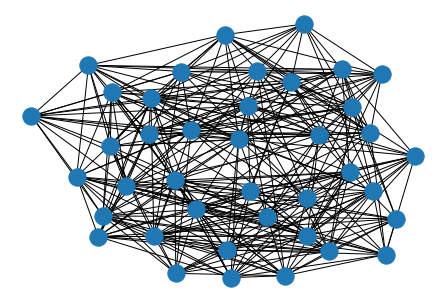

In [8]:
n2 = 40    # number of vertices
m2 = 100   # number of edges across the cut
m2in = 200   # number of edges within each side of the bipartition

B2 = np.zeros((m2+2*m2in,n2))
#A = np.zeros(n,n)
EdgeList2 = []

# add the edges across the cut
for r in range(0,m2):
    i = np.random.randint(0,n2/2)
    j = np.random.randint(n2/2,n2)
    B2[r,i] = 1
    B2[r,j] = -1
    EdgeList2.append([i,j])
# the edges on the left
for r in range(0,m2in):
    i = np.random.randint(0,n2/2)
    j = np.random.randint(0,n2/2)
    B2[m2+r,i] = 1
    B2[m2+r,j] = -1
    EdgeList2.append([i,j])
# the edges on the right
for r in range(m2in,2*m2in):
    i = np.random.randint(n2/2,n2)
    j = np.random.randint(n2/2,n2)
    B2[m2+r,i] = 1
    B2[m2+r,j] = -1
    EdgeList2.append([i,j])
    
H = nx.from_edgelist(EdgeList2)
nx.draw_kamada_kawai(H)

This time the graph drawing software shows the relatively sparse cut across the two components nicely. Let's see if we can see it in the last non-trivial singular vector. 

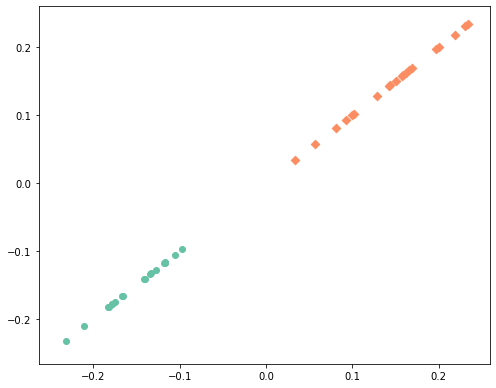

In [9]:
U_small_cut, S_small_cut, Vt_small_cut = np.linalg.svd(B2, full_matrices=False)

fig = plt.figure(figsize=(7.0,5.5))
ax = fig.add_subplot(111)

plt.scatter(Vt_small_cut[n-2,:int(n/2)-1],
            Vt_small_cut[n-2,:int(n/2)-1],
            marker='o',
            color='#66c2a5',
            zorder=1000)

plt.scatter(Vt_small_cut[n-2,int(n/2):],
            Vt_small_cut[n-2,int(n/2):],
            marker='D',
            color='#fc8d62',
            zorder=1000)

plt.tight_layout()

Feel free to play with the parameters: to see how things change when the relative sizes of the bipartition vary, and when the relative density of the edges across the cut changes.

---

## The Incidence Matrix and the Graph Laplacian

Recall that the incidence matrix $B$ gives rise to the graph Laplacian as follows $L = B^\intercal B$. In turn the Laplacian is obtained by taking the adjacancy matrix $A$ of the graph, negating its entries, and then putting the vertex degrees on the diagonal. Specifically, if $D$ is the diagonal matrix with the vertex degrees, then $L = D - A$. Hence the right singular vectors of $B$ are the eigenvectors of $L$.

In other words, the eigenvector for the second-smallest eigenvalue of the Laplacian tends to give us small cuts. The eigenvector for the largest eigenvalue gives us the large cuts.